In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

sns.set_style('whitegrid')

In [8]:
df = pd.read_excel(r'C:\Users\jfrank\OneDrive - Specialized Bicycle Components\Win Tunnel Stuffs\210721_Tailwind Bag Benchmarking\210721_Tailwind Bag Benchmarking.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ForceAxial                      36 non-null     float64
 1   ForceSide                       36 non-null     float64
 2   Torque                          36 non-null     float64
 3   DynamicPressure                 36 non-null     float64
 4   RelativeHumidity                36 non-null     float64
 5   Temperature                     36 non-null     float64
 6   BarometricPressure              36 non-null     float64
 7   BodyDrag                        36 non-null     float64
 8   BodySide                        36 non-null     float64
 9   AirDensity                      36 non-null     float64
 10  AirSpeed                        36 non-null     float64
 11  BodyQ                           36 non-null     float64
 12  BodyCdA                         36 non

ForceAxial   ForceSide    Torque  DynamicPressure  RelativeHumidity  \
0  1923.437701 -224.419123  0.080332        46.199177         37.520303   
1  1914.862161 -217.629888  0.114235        45.865995         37.484158   
2  1925.691158 -228.460192  0.112958        46.245548         37.512630   
3  1305.516660 -140.688511  0.111339        28.442284         37.480111   
4  1918.606058 -228.181564  0.103865        45.873680         37.541634   

   Temperature  BarometricPressure     BodyDrag    BodySide  AirDensity  ...  \
0    25.861150        99514.578271  1923.437701  224.419123    1.154351  ...   
1    25.771990        99498.180682  1914.862161  217.629888    1.154530  ...   
2    25.841803        99510.473001  1925.691158  228.460192    1.154383  ...   
3    25.701365        99479.793739  1305.516660  140.688511    1.154605  ...   
4    25.776424        99503.202810  1918.606058  228.181564    1.154563  ...   

   pressure_voltage  force1_zero_voltage  force2_zero_voltage  \
0          7.004165             -0.13179             0.221398   
1          6.999480             -0.13179             0.221398   
2          7.002992             -0.13179             0.221398   
3          6.994227             -0.13179             0.221398   
4          7.000915             -0.13179             0.221398   

   force3_zero_voltage  pitot_zero_voltage  relative_humidity_zero_voltage  \
0             0.296948            0.023321                               0   
1             0.296948            0.023321                               0   
2             0.296948            0.023321                               0   
3             0.296948            0.023321                               0   
4             0.296948            0.023321                               0   

   temperature_zero_voltage  pressure_zero_voltage  image_index     title  
0                         0                      0            1  baseline  
1                         0                      0            2  baseline  
2                         0                      0            3  baseline  
3                         0                      0            4  baseline  
4                         0                      0            5  baseline  

[5 rows x 30 columns]

In [47]:
grouped = pd.DataFrame(df.groupby(['yawAngle_deg', 'title'])['BodyCdA'].mean().unstack())
grouped.round(3)

title         EU3 3-18  EU3 3-18 w/ Clay  Evade 2 CE  OPT B  OPT B w/ Clay  \
yawAngle_deg                                                                 
-15              0.315             0.314       0.317  0.316          0.317   
-10              0.315             0.313       0.315  0.312          0.314   
-5               0.313             0.311       0.311  0.312          0.313   
 0               0.314             0.313       0.315  0.314          0.314   
 5               0.315             0.311       0.315  0.312          0.314   
 10              0.311             0.311       0.314  0.312          0.310   
 15              0.321             0.319       0.321  0.318          0.320   

title         YS-1 CHIN  YS1-1 CHIN w/ Clay  
yawAngle_deg                                 
-15               0.316               0.320  
-10               0.313               0.311  
-5                0.312               0.311  
 0                0.313               0.313  
 5                0.312               0.312  
 10               0.312               0.311  
 15               0.318               0.317

In [36]:
cols = grouped.columns.tolist()
cols

['EU3 3-18',
 'EU3 3-18 w/ Clay',
 'Evade 2 CE',
 'OPT B',
 'OPT B w/ Clay',
 'YS-1 CHIN',
 'YS1-1 CHIN w/ Clay']

In [48]:
cols = [ 'Evade 2 CE','EU3 3-18',
 'EU3 3-18 w/ Clay',
 'OPT B',
 'OPT B w/ Clay',
 'YS-1 CHIN',
 'YS1-1 CHIN w/ Clay']
cols
grouped = grouped[cols]
#grouped.to_csv('output.csv')
grouped.round(3)

title         Evade 2 CE  EU3 3-18  EU3 3-18 w/ Clay  OPT B  OPT B w/ Clay  \
yawAngle_deg                                                                 
-15                0.317     0.315             0.314  0.316          0.317   
-10                0.315     0.315             0.313  0.312          0.314   
-5                 0.311     0.313             0.311  0.312          0.313   
 0                 0.315     0.314             0.313  0.314          0.314   
 5                 0.315     0.315             0.311  0.312          0.314   
 10                0.314     0.311             0.311  0.312          0.310   
 15                0.321     0.321             0.319  0.318          0.320   

title         YS-1 CHIN  YS1-1 CHIN w/ Clay  
yawAngle_deg                                 
-15               0.316               0.320  
-10               0.313               0.311  
-5                0.312               0.311  
 0                0.313               0.313  
 5                0.312               0.312  
 10               0.312               0.311  
 15               0.318               0.317

In [54]:
#Remove 15 yaw. Helmet team isn't interested
diffs = grouped.subtract(grouped['Evade 2 CE'],axis = 'index')#,fill_value = 0)
diffs = diffs.iloc[1:-1]
diffs

title         Evade 2 CE  EU3 3-18  EU3 3-18 w/ Clay     OPT B  OPT B w/ Clay  \
yawAngle_deg                                                                    
-10                  0.0  0.000026         -0.002253 -0.002449      -0.001109   
-5                   0.0  0.002162          0.000285  0.000587       0.002162   
 0                   0.0 -0.001208         -0.001813 -0.001005      -0.001282   
 5                   0.0 -0.000754         -0.003997 -0.003043      -0.001012   
 10                  0.0 -0.002868         -0.003281 -0.002075      -0.003662   

title         YS-1 CHIN  YS1-1 CHIN w/ Clay  
yawAngle_deg                                 
-10           -0.002232           -0.004169  
-5             0.001156           -0.000597  
 0            -0.002057           -0.002252  
 5            -0.002867           -0.003643  
 10           -0.001651           -0.003378

In [55]:
#Original weighting algo from wheels + Mio. 
# For -16 - +16 in 2 deg increments
# [1.00, 1.31, 1.81, 2.51, 3.67, 5.02, 8.04, 15.07, 23.11, 15.07, 8.04, 5.02, 3.67, 2.51, 1.81, 1.31, 1.00]
#For this analysis I fit exponential curve and solved for +/- 5. Which gave a wt = 7/34

diffs['wt'] =  [ 2.51, 7.34, 23.11, 7.34,  2.51]
diffs['wt'] /= 100
diffs

title         Evade 2 CE  EU3 3-18  EU3 3-18 w/ Clay     OPT B  OPT B w/ Clay  \
yawAngle_deg                                                                    
-10                  0.0  0.000026         -0.002253 -0.002449      -0.001109   
-5                   0.0  0.002162          0.000285  0.000587       0.002162   
 0                   0.0 -0.001208         -0.001813 -0.001005      -0.001282   
 5                   0.0 -0.000754         -0.003997 -0.003043      -0.001012   
 10                  0.0 -0.002868         -0.003281 -0.002075      -0.003662   

title         YS-1 CHIN  YS1-1 CHIN w/ Clay      wt  
yawAngle_deg                                         
-10           -0.002232           -0.004169  0.0251  
-5             0.001156           -0.000597  0.0734  
 0            -0.002057           -0.002252  0.2311  
 5            -0.002867           -0.003643  0.0734  
 10           -0.001651           -0.003378  0.0251

In [88]:
# Differences in CdA
print('EU3 3-18 is {} counts different than the Evade 2 CE'.format(((diffs['EU3 3-18']*diffs['wt']).sum()/(diffs['wt'].sum())).round(4)))
print('EU3 3-18 with Clay is {} counts different than the Evade 2 CE'.format(((diffs['EU3 3-18 w/ Clay']*diffs['wt']).sum()/(diffs['wt'].sum())).round(4)))
print('OPT B is {} counts different than the Evade 2 CE'.format(((diffs['OPT B']*diffs['wt']).sum()/(diffs['wt'].sum())).round(4)))
print('OPT B is {} counts different than the Evade 2 CE'.format(((diffs['OPT B w/ Clay']*diffs['wt']).sum()/(diffs['wt'].sum())).round(4)))
print('YS1-1 CHIN is {} counts different than the Evade 2 CE'.format(((diffs['YS-1 CHIN']*diffs['wt']).sum()/(diffs['wt'].sum())).round(4)))
print('YS1-1 CHIN with Clay is {} counts different than the Evade 2 CE'.format(((diffs['YS1-1 CHIN w/ Clay']*diffs['wt']).sum()/(diffs['wt'].sum())).round(4)))



EU3 3-18 is -0.0006 counts different than the Evade 2 CE
EU3 3-18 with Clay is -0.0019 counts different than the Evade 2 CE
OPT B is -0.0012 counts different than the Evade 2 CE
OPT B is -0.0008 counts different than the Evade 2 CE
YS1-1 CHIN is -0.0016 counts different than the Evade 2 CE
YS1-1 CHIN with Clay is -0.0024 counts different than the Evade 2 CE


In [93]:
#Differences in time saved over 40km
print('EU3 3-18:  {} seconds over 40km'.format(((diffs['EU3 3-18']*diffs['wt']).sum()/(diffs['wt'].sum())).round(4)*4000))
print('EU3 3-18 with Clay:  {} seconds over 40km'.format(((diffs['EU3 3-18 w/ Clay']*diffs['wt']).sum()/(diffs['wt'].sum())).round(4)*4000))
print('OPT B:  {} seconds over 40km'.format(((diffs['OPT B']*diffs['wt']).sum()/(diffs['wt'].sum())).round(4)*4000))
print('OPT B with Clay:  {} seconds over 40km'.format(((diffs['OPT B w/ Clay']*diffs['wt']).sum()/(diffs['wt'].sum())).round(3)*4000))
print('YS1 -1 CHIN:  {} seconds over 40km'.format(((diffs['YS-1 CHIN']*diffs['wt']).sum()/(diffs['wt'].sum())).round(4)*4000))
print('YS1 -1 CHIN with Clay:  {} seconds over 40km'.format(((diffs['YS1-1 CHIN w/ Clay']*diffs['wt']).sum()/(diffs['wt'].sum())).round(4)*4000))

EU3 3-18:  -2.4 seconds over 40km
EU3 3-18 with Clay:  -7.6 seconds over 40km
OPT B:  -4.8 seconds over 40km
OPT B with Clay:  -4.0 seconds over 40km
YS1 -1 CHIN:  -6.4 seconds over 40km
YS1 -1 CHIN with Clay:  -9.6 seconds over 40km


C:\Users\jfrank\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


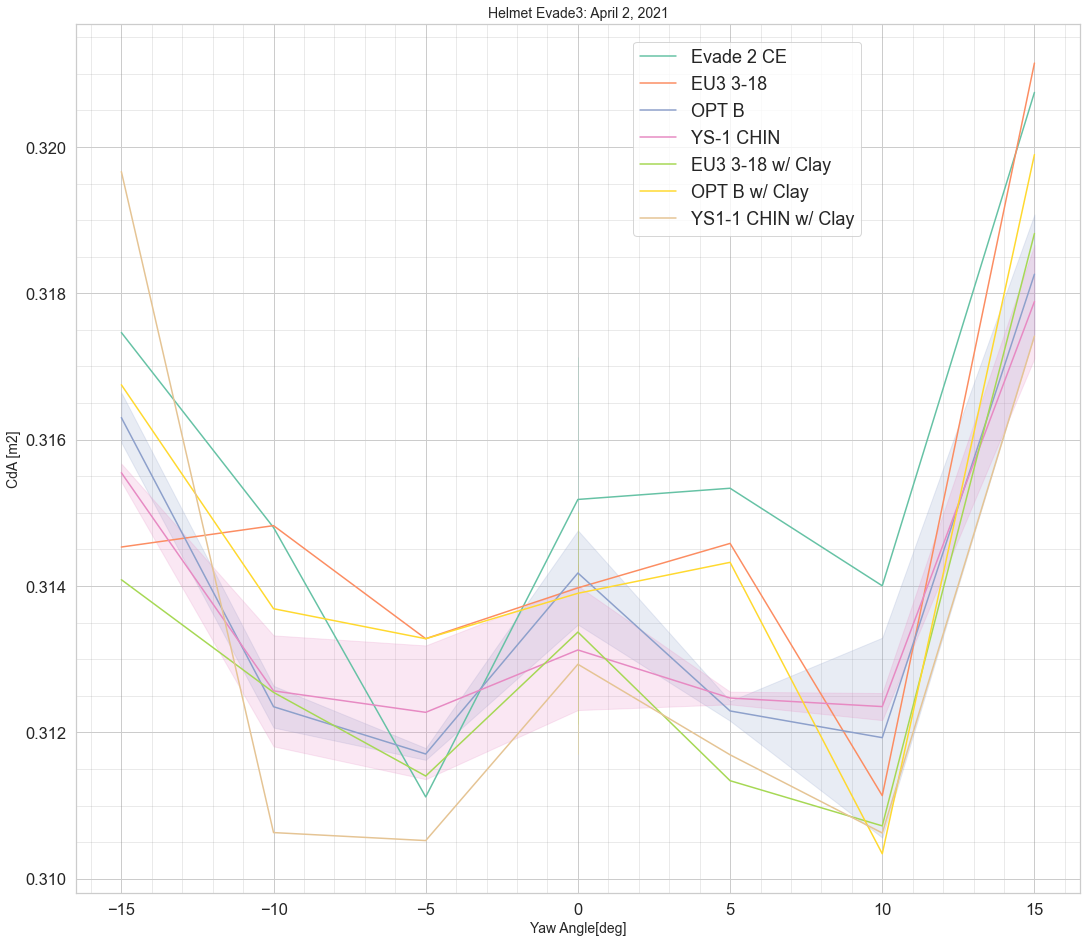

In [41]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (18, 16))

sns.lineplot('yawAngle_deg', 'BodyCdA', data = df,  
                                         alpha = 1.0, hue = 'title', palette = 'Set2')#,
                                         #markers = True, markersize=8, linewidth = 2)

ax.set_ylabel('CdA [m2]', fontsize =14)
ax.set_xlabel('Yaw Angle[deg]', fontsize =14)
plt.title('Helmet Evade3: April 2, 2021', fontsize = 14)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.legend(bbox_to_anchor=(0.8, 1), loc=1, borderaxespad=1., fontsize =18)